In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt
w0 = [1,0,0,0]
w1 = [0,1,0,0]
w2 = [0,0,1,0]
w3 = [0,0,0,1]
w4 = [-1,1,-1,1]
w5 = [-1,0,0,0]
w6 = [0,-1,0,0]
w7 = [0,0,-1,0]
w8 = [0,0,0,-1]
w9 =[1,-1,1,-1]

v_1_g  = [1, 0, 1, -1]
v_z_g  = [1, 0, 1, 0]
v_z2_g = [0, 1, 0, 1]
v_z3_g = [-1, 1, 0, 1]

edges = []
def add_edge(v1, v2,color='k-'):
    edges.append((v1, v2))
    plt.plot([v1[0], v2[0]], [v1[1], v2[1]], color)
    #plt.axis('equal')
    
R=[[0,1,0,0], [0,0,1,0],[0,0,0,1],[-1,1,-1,1]] # Matriz de rotación 
W= np.array([[1, 0],[math.cos(36*math.pi/180), math.sin(36*math.pi/180)],[math.cos(72*math.pi/180), math.sin(72*math.pi/180)],[math.cos(108*math.pi/180), math.sin(108*math.pi/180)]]) #Matriz de Mapeo

O=[0,0,0,0] #origen
origin = [1,2,3,4]
v_originales  = [O,w0,np.add(w0,w2),w2] #rombo gordo
v_originaless = [O,w0,np.add(w0,w1),w1] #rombo delgado
translation_vector = [x - y for x, y in zip(origin, [0, 0, 0, 0])] #se lo sumas al origin


def vertices_tras(v_originales_new, translation_vector,f,t):
    translated_vertices_new= [[[x + y for x, y in zip(vertex, translation_vector)] for vertex in v_originales_new],0,f,t]
    return translated_vertices_new

translated_vertices_new1N=vertices_tras(v_originales, translation_vector,0,0)
translated_vertices_new1d1N=vertices_tras(v_originaless, translation_vector,0,0)

In [2]:
L_ss=[]
def graficaR2N(L):
    Lx=[]
    Ly=[]
    ss=[np.dot(k,W) for k in L]
    L_ss.append(ss)
    for k in range(len(ss)):
        add_edge(ss[k], ss[k-1], '-k')
        Lx.append(ss[k][0])
        Ly.append(ss[k][1])
    return L_ss, Lx, Ly


In [98]:
import numpy as np

class Rombo:
    def __init__(self, origin, v_originales,v_originaless):
        self.origin = origin
        self.v_originales = v_originales
        self.v_originaless = v_originaless

    def inf_v(self, vertices):
        v_inflados = []
        for i in range(len(vertices)):
            result = np.dot(vertices[i][0], v_1_g) + np.dot(vertices[i][1], v_z_g) + \
                     np.dot(vertices[i][2], v_z2_g) + np.dot(vertices[i][3], v_z3_g)
            v_inflados.append(result)
        return v_inflados

    def ShiftssN(self, vertices, shift_vector, val):
        shift = vertices[0] + np.dot(shift_vector, np.linalg.matrix_power(R, val))
        return shift

    def GenverticesN(self, vecO, orient, shift_Mif, f, tipo):
        Rt = np.linalg.matrix_power(R, orient)
        trans = [np.dot(i, Rt) for i in vecO]
        transs = [[np.add(s, shift_Mif[0]) for s in trans], orient, f[1], tipo]
        return transs
    def apply_ruleG(self, Lvec, shift_vector, val, name):
        for j in Lvec:
            v_inflados_Mif = self.inf_v(j[0])
            v_inflados_tMif = np.add(self.origin, v_inflados_Mif)
            shifts_Mif = self.ShiftssN(v_inflados_tMif, self.inf_v([shift_vector]), j[1])
            L_vertices_Mif = self.GenverticesN(self.v_originales, j[1]+val, shifts_Mif, j[0], name)
        return L_vertices_Mif
    def apply_ruleD(self, Lvec, shift_vector, val, name):
        for j in Lvec:
            v_inflados_Mif = self.inf_v(j[0])
            v_inflados_tMif = np.add(self.origin, v_inflados_Mif)
            shifts_Mif = self.ShiftssN(v_inflados_tMif, self.inf_v([shift_vector]), j[1])
            L_vertices_Mif = self.GenverticesN(self.v_originaless, j[1]+val, shifts_Mif, j[0], name)
        return L_vertices_Mif
        
rombo_instance = Rombo(origin, v_originales,v_originaless)
# rombo_instance.translated_vertices = translated_vertices_new1N


RG1 = rombo_instance.apply_ruleG([translated_vertices_new1N],[1, 0, 1, 0], val=-5, name="RomboG") #[1, 0, 1, 0] -5
RG2 = rombo_instance.apply_ruleG([translated_vertices_new1N],[1, 0, 0, 0], val=-6, name="RomboG")
RG3 = rombo_instance.apply_ruleG([translated_vertices_new1N],[0, 0, 1, 0], val=6, name="RomboG") #[0, 0, 1, 0]
RD1 = rombo_instance.apply_ruleD([translated_vertices_new1d1N],[1, -1, 1, 0], val=-1, name="RomboD1")
RD2 = rombo_instance.apply_ruleD([translated_vertices_new1d1N],[0, 1, 0, 1], val=-3, name="RomboD2")

rD1 = rombo_instance.apply_ruleD([translated_vertices_new1d1N],[0,2,-1,1],val=-3, name="RomboD1") #[0,2,-1,1]
rD2 = rombo_instance.apply_ruleD([translated_vertices_new1d1N],[1,0,0,0],val=3, name="RomboD2") #[1,0,0,0]
rG1 = rombo_instance.apply_ruleG([translated_vertices_new1d1N],[1,1,0,0],val=5, name="RomboG1")
rG2 = rombo_instance.apply_ruleG([translated_vertices_new1N],[0,0,0,0],val=-1, name="RomboG2")

NI1 = rombo_instance.apply_ruleG([translated_vertices_new1N],[0, 0, 0, 0], val=2, name="RomboG")
NI2 = rombo_instance.apply_ruleG([translated_vertices_new1N],[0, 0, 0, 0], val=-2, name="RomboG")
NI3 = rombo_instance.apply_ruleG([translated_vertices_new1N],[0, 0, 0, 0], val=0, name="RomboG")
NI4 = rombo_instance.apply_ruleG([translated_vertices_new1N],[0, 0, 0, 0], val=-4, name="RomboG")
NI5 = rombo_instance.apply_ruleG([translated_vertices_new1N],[0, 0, 0, 0], val=4, name="RomboG")

ni1 = rombo_instance.apply_ruleD([translated_vertices_new1d1N],[0,0,1,0],val=-1, name="RomboD1")
ni2 = rombo_instance.apply_ruleD([translated_vertices_new1d1N],[1,0,0,0],val=3, name="RomboD2")
mi1 = rombo_instance.apply_ruleG([translated_vertices_new1d1N],[0,1,1,0],val=-3, name="RomboG1")
mi2 = rombo_instance.apply_ruleG([translated_vertices_new1N],[0,0,0,0],val=-1, name="RomboG2")


MI1 = rombo_instance.apply_ruleG([translated_vertices_new1N],[1, 0, 0, 0], val=-6, name="RomboG")
MI2 = rombo_instance.apply_ruleD([translated_vertices_new1d1N],[1,-1,1,0],val=-1, name="RomboD1")
MI3 = rombo_instance.apply_ruleD([translated_vertices_new1d1N],[1,0,1,-1],val=-5, name="RomboD2")

tryon=[MI1,MI2,MI3]
Lnuevo2=[ni1,ni2,mi1,mi2]
LnuevoI=[NI1, NI2, NI3, NI4, NI5]
LGordo=[RG1,RG2,RG3,RD1,RD2]
LDelgado=[rD1,rD2,rG1,rG2]
# for i in LGordo:
#     graficaR2N(i[0])
# plt.figure(figsize=(12, 8))

Iteration time: 0.011855125427246094 seconds
Iteration time: 0.019340038299560547 seconds
Iteration time: 0.055297136306762695 seconds
Iteration time: 0.22976374626159668 seconds
Iteration time: 1.6613099575042725 seconds


(100.02386504852657, 146.15085671958695, 340.440294532569, 380.72441945232896)

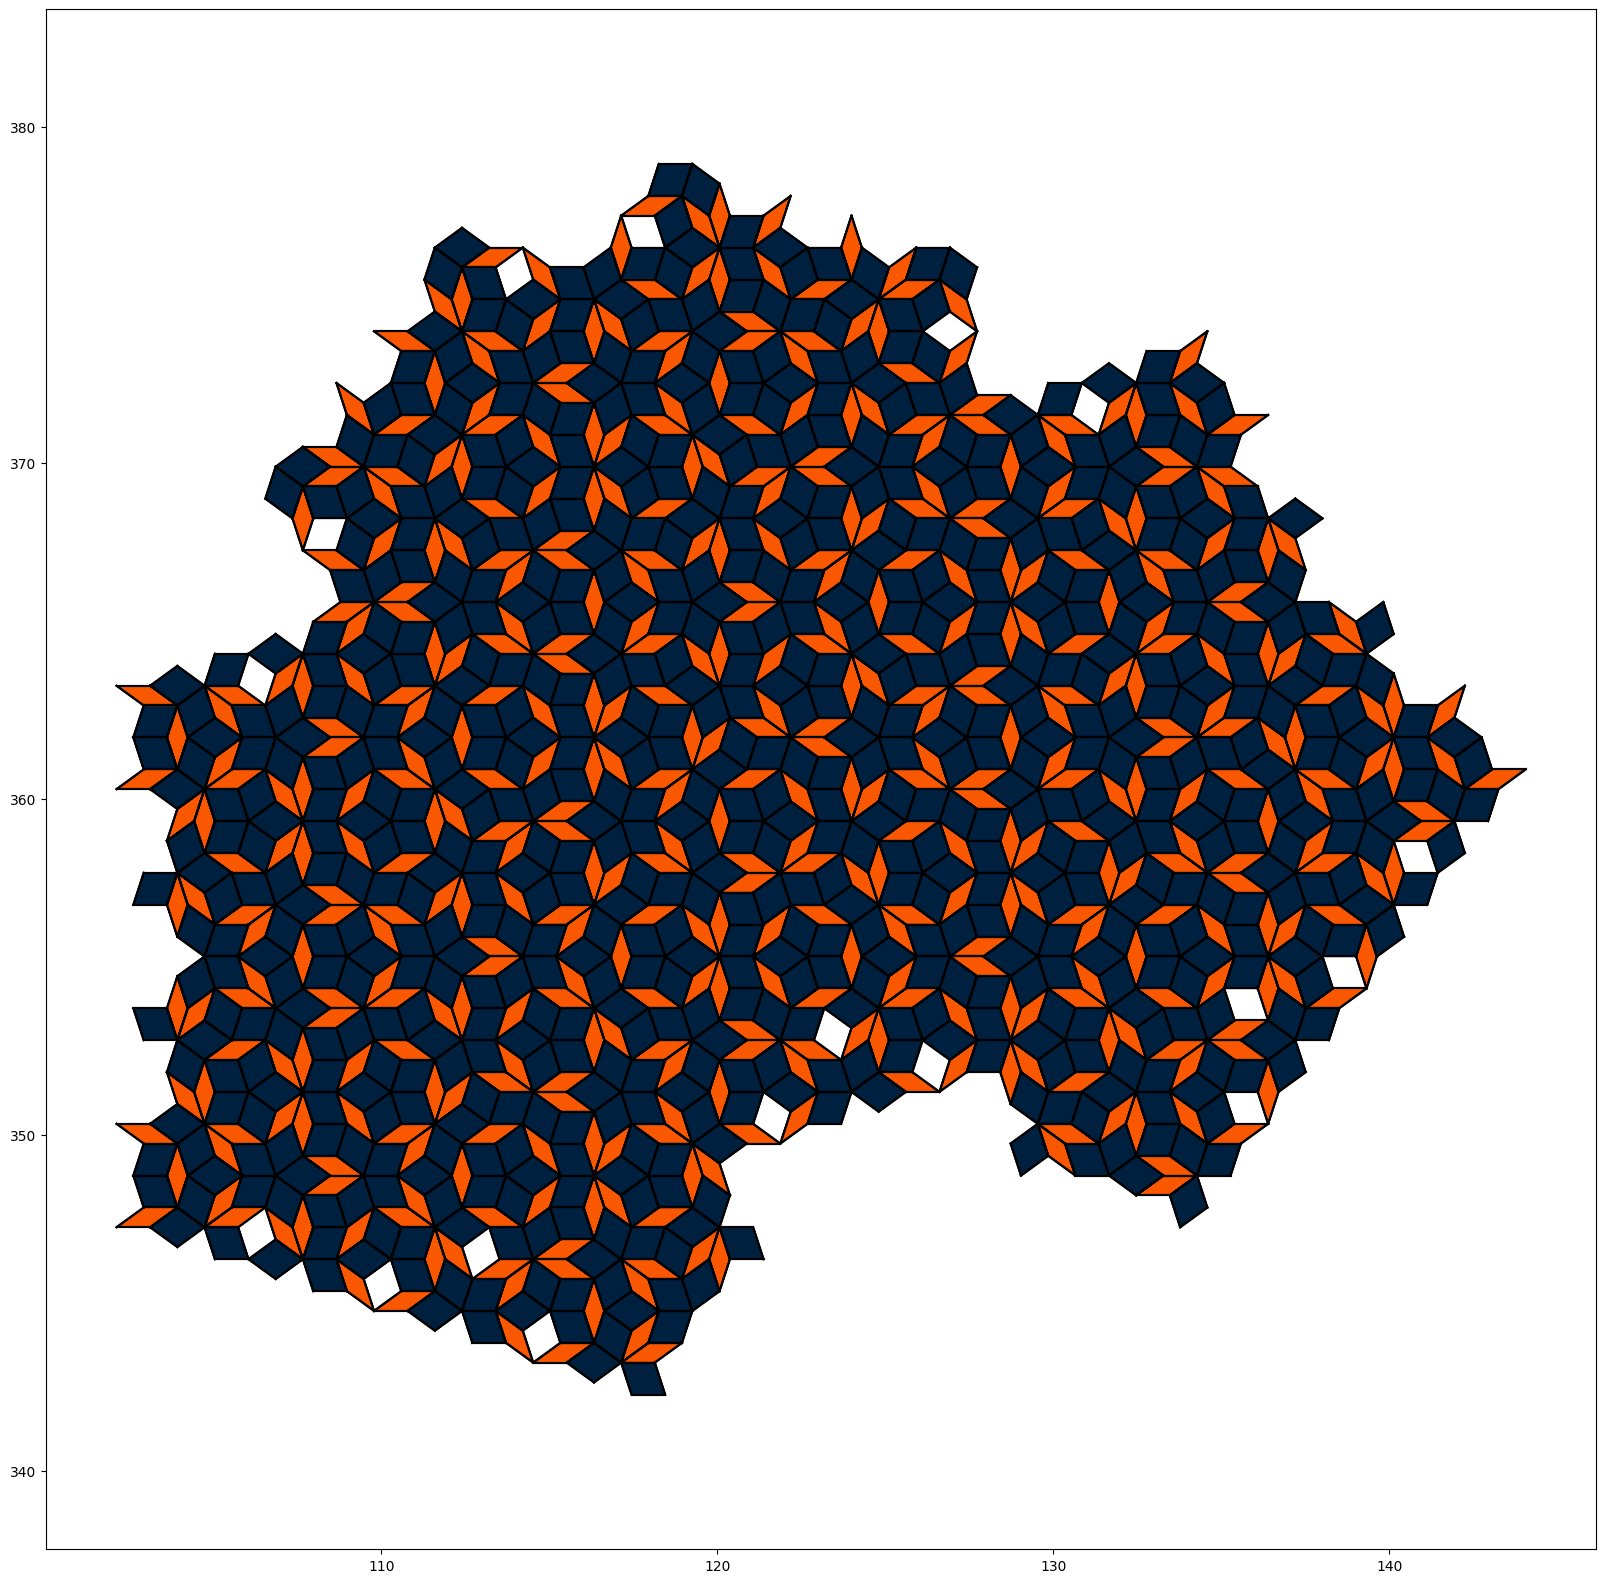

In [100]:
import time

class TessellationIterator:
    def __init__(self, initial_tessellation, origin, v_originales, v_originaless):
        self.tessellation = initial_tessellation
        self.origin = origin
        self.v_originales = v_originales
        self.v_originaless = v_originaless

    def inflation(self, lvec):
        L = []
        for j in lvec:
            if j[3] == "RomboG" or j[3] == "RomboG1" or j[3] == "RomboG2":
                RG1 = rombo_instance.apply_ruleG([j],[1, 0, 1, 0], val=-5, name="RomboG")
                RG2 = rombo_instance.apply_ruleG([j],[1, 0, 0, 0], val=-6, name="RomboG")
                RG3 = rombo_instance.apply_ruleG([j],[0, 0, 1, 0], val=6, name="RomboG") #[0, 0, 1, 0]
                RD1 = rombo_instance.apply_ruleD([j],[1, -1, 1, 0], val=-1, name="RomboD1")
                RD2 = rombo_instance.apply_ruleD([j],[0, 1, 0, 1], val=-3, name="RomboD2")
                L.append(RG1)
                L.append(RG2)
                L.append(RG3)
                L.append(RD1)
                L.append(RD2)
            if j[3] == "RomboD1" or j[3] == "RomboD2":
                rD1 = rombo_instance.apply_ruleD([j],[0,2,-1,1],val=-3, name="RomboD1")
                rD2 = rombo_instance.apply_ruleD([j],[1,0,0,0],val=3, name="RomboD2")
                rG1 = rombo_instance.apply_ruleG([j],[1,1,0,0],val=5, name="RomboG1")
                rG2 = rombo_instance.apply_ruleG([j],[0,0,0,0],val=-1, name="RomboG2")
                L.append(rD1)
                L.append(rD2)
                L.append(rG1)
                L.append(rG2)
        return L

    def remove_duplicates(self, lvec):
        seen = set()
        result = []

        for l in lvec:
            frozen = frozenset(tuple(arr) for arr in l[0])
            if frozen not in seen:
                seen.add(frozen)
                result.append(l)

        return result, seen

    def graph_iteratively(self, results):
        for j in results:
            graficaR2N(j[0])

#     def fill(self,results):
#         for j in results:
#             L_ss, Lx, Ly=graficaR2N(j[0])
#             if j[3] == "RomboG":
#                 plt.fill(Lx, Ly, color='#FFD700') #color='#FFD700' #ec77bb
#             elif j[3]== "RomboG1":
#                 plt.fill(Lx, Ly, color='#be0069')
#             elif j[3]== "RomboG2":
#                 plt.fill(Lx, Ly, color='#f0a0ab')
#             else:
#                 plt.fill(Lx, Ly, color='#191970') #color='#191970' 
    
    def fill(self,results):
        for j in results:
            L_ss, Lx, Ly=graficaR2N(j[0])
            if j[3] == "RomboG":
                plt.fill(Lx, Ly, color='#00203FFF') #color='#FFD700' #000a51 #6495ED color='#00203FFF' #48D1CC
            elif j[3]== "RomboG1":
                plt.fill(Lx, Ly, color='#00203FFF')
            elif j[3]== "RomboG2":
                plt.fill(Lx, Ly, color='#00203FFF')
            else:
                plt.fill(Lx, Ly, color='#F95700FF') #color='#191970'  #008B8B    color='#F95700FF' #191970
                
    def iterate_and_graph(self, num_iterations):
        for _ in range(num_iterations):
            start_time = time.time()
            self.tessellation = self.inflation(self.tessellation)
            end_time = time.time()
            iteration_time = end_time - start_time
            print(f"Iteration time: {iteration_time} seconds")
    
        result, _ = self.remove_duplicates(self.tessellation)
        self.graph_iteratively(result)
        self.fill(result)
plt.figure(figsize=(20, 20))
initial_tessellation=LDelgado
tessellation_iterator = TessellationIterator(initial_tessellation, origin, v_originales, v_originaless)
tessellation_iterator.iterate_and_graph(5)

# x = 6.04508497
# y = 20.50697153
# k = [8.16311896, 22.0458133]
# k2 = [6.85410197, 21.09475678]

#plt.scatter(x, y, color='orange', marker='o', label='O translated origin',s=100)
#plt.scatter(k[0], k[1], color='blue', marker='o', label=r'$\tilde{\omega}$')
# plt.scatter(k[0], k[1], color='#8BC34A', marker='>', label=r'$\omega^0 + \omega^2$', s=100)
# plt.scatter(k[0], k[1], color='blue', marker='o', label=r'$\tilde{\omega}$', s=100)

# plt.legend(fontsize=23)
#fig, ax = plt.subplots(figsize=(80, 50))
# ax.set_aspect('equal')
# ax.set_xlim(-1, 3)
# ax.set_ylim(-1, 3)
plt.axis('equal') 